# Project: TMDb movie data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analyze the TMDb dataset. This dataset contains information over more then 10,000 movies collected from The Movie Database (TMDb). 
> With this analysis we will answer the following questions:
> - What are the top 10 Movies by revenue & margin?
> - What genre causes the most revenue and margin?
> - What are the most common genres?
> - Is there any relationship between genre and vote average?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# import 'tmdb-movies.csv'
df = pd.read_csv('tmdb-movies.csv')

> At first I will use the funcitons head(), shape, describe() and info() to better understand the dataset.

In [3]:
df.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

> The first thing that we can notice is that some of the columns contain multiple values like 'cast' or 'genres'.

In [4]:
df.tail(5)

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

> By analyzing the data from the tail we can see that there are some samples with a budget and / or revenue of zero.
> This suggests that this dataset does not provide that kind of informations for some rows.

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

> Now we can see even better how the missing information on revenue and budget effects the dataset. In order to draw appropriate conclusions, we have to clear these rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Here we can see that some values are missing.
> Most of them are no problem for our approach, because we were going to drop them anyway. The column 'genres' is incomplete but relevant for our analysis. We need to get a deeper understanding to figure out how to fix the problem. A value cannot be determined from the existing data.
> I will look at it again as soon as I have adjusted the dataset for the missing revenue and budget.
> The datatypes are accurate in this dataset.

### Data Cleaning to do's

- Drop Unecassary Columns
- Remove Zero Values
- Remove Duplicates
- Cleaning Column 'genres'

> Lets start by removing the unneedet columns for our analysis.

In [8]:
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'director', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

> Now we will remove all raws in 'Revenue' and 'Budget' wich contain a value of '0'.

In [9]:
# Removing all rows that contain a revenue of 0.
df = df[df.revenue != 0]

In [10]:
# Removing all rows that contain a budget of 0.
df = df[df.budget !=0]

In [11]:
df.shape

(3855, 10)

> We can see that the number of rows has been reduced significantly from the original 10866 to 3855.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   popularity      3855 non-null   float64
 2   budget          3855 non-null   int64  
 3   revenue         3855 non-null   int64  
 4   original_title  3855 non-null   object 
 5   runtime         3855 non-null   int64  
 6   genres          3855 non-null   object 
 7   vote_count      3855 non-null   int64  
 8   vote_average    3855 non-null   float64
 9   release_year    3855 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 331.3+ KB


> You can see that each column has the same number of values. The datatype is also corresponding to the values behind it. This part of the cleanup is now complete.

In [13]:
df.describe()

id   popularity        budget       revenue      runtime  \
count    3855.000000  3855.000000  3.855000e+03  3.855000e+03  3855.000000   
mean    39888.783398     1.191400  3.720183e+07  1.076589e+08   109.215824   
std     67213.815955     1.475002  4.220291e+07  1.765248e+08    19.922166   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6074.000000     0.462448  1.000000e+07  1.357645e+07    95.000000   
50%     11322.000000     0.797298  2.400000e+07  4.479322e+07   106.000000   
75%     38577.000000     1.368245  5.000000e+07  1.241530e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year  
count  3855.000000    3855.00000   3855.000000  
mean    527.611933       6.16786   2001.263294  
std     879.868374       0.79504     11.281989  
min      10.000000       2.20000   1960.000000  
25%      71.000000       5.70000   1995.000000  
50%     204.000000       6.20000   2004.000000  
75%     580.000000       6.70000   2010.000000  
max    9767.000000       8.40000   2015.000000

> Here we can see that the correction of the Budget & Revenues has helped to achieve a higher validity of the values.

> Lets check if there are any duplicate rows and drop them.

In [14]:
# Check duplicate rows.
df.duplicated().sum()

1

In [15]:
# Drop duplicate rows and check again.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

> We still have to clean up the 'genres' column, because it contains muplitple values in one cell.
> For my analysis we will assume that the first genre named is always the 'main' genre of the movie and so on.
> For this we will split the genres in different columns and add the new columns in our dataset.

In [16]:
# Splitting the values in column 'genres' by '|'.
df_genres = df['genres'].str.split('|', expand=True)

In [17]:
# Renaming the new columns.
df_genres = df_genres.rename(columns={0: 'main_genre', 1: "second_genre", 2: "third_genre", 3: "fourth_genre", 4: "fifth_genre"})

In [18]:
# Removing the old 'genres' column out of the dataframe.
df.drop('genres', axis=1, inplace=True)

In [19]:
# Merging the new genre columns with the original dataframe.
df = df.merge(df_genres, left_index=True, right_index=True, how = 'inner')

In [20]:
# Checking the dataframe for the changed applied.
df.head(1)

id  popularity     budget     revenue  original_title  runtime  \
0  135397   32.985763  150000000  1513528810  Jurassic World      124   

   vote_count  vote_average  release_year main_genre second_genre  \
0        5562           6.5          2015     Action    Adventure   

       third_genre fourth_genre fifth_genre  
0  Science Fiction     Thriller        None

<a id='eda'></a>
## Exploratory Data Analysis

> - What are the top 10 Movies by revenue & margin?
> - What genre causes the most revenue and margin?
> - What are the most common genres?
> - Is there any relationship between genre and vote average?

### Research Question 1:  What Are The Top 10 Movies By Revenue & Margin?

> To anwer this Question we have to add a new column to our dataset.
> We will add the column 'margin' to the dataset, by subtracting the budget from the revenue.

In [21]:
# Adding 'margin' column to the dataset.
df['margin'] = df['revenue'] - df['budget']

> Now we will create two more dataframes and sort them by revenue and budget

In [22]:
# Create two new dataframes, sort the values by revenue/margin and use only the top 10 values.
top10rev = df.sort_values('revenue', ascending=False).head(10)
top10db = df.sort_values('margin', ascending=False).head(10)

In [23]:
# Define new function for plotting bar-charts.

def barh_plot(data, x, y, title, xlabel, ylabel, kind):
    sns.set_style('whitegrid')
    data.plot(x=x, y=y, kind=kind,figsize=(10,8))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    return;

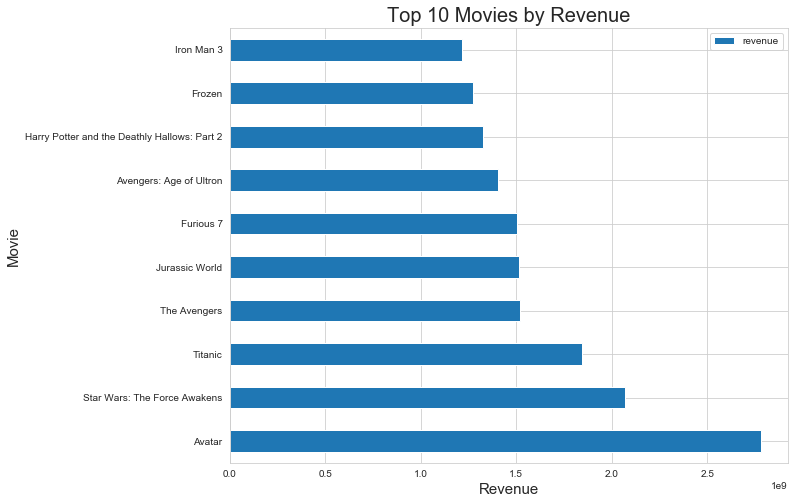

In [24]:
# Plotting a Bar-Chart for the Top 10 Revenue.

barh_plot(top10rev, 'original_title', 'revenue', 'Top 10 Movies by Revenue','Revenue', 'Movie', 'barh')

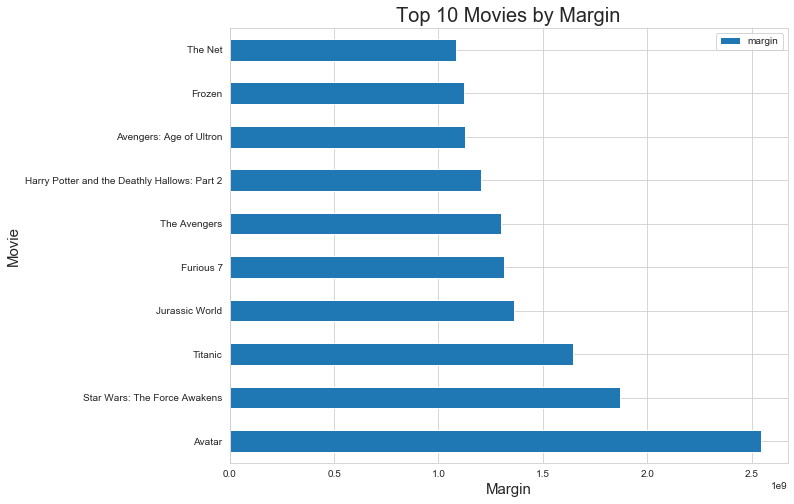

In [25]:
# Plotting a Bar-Chart for the Top 10 Margin.

barh_plot(top10db, 'original_title', 'margin', 'Top 10 Movies by Margin','Margin', 'Movie', 'barh')

> Now we can see the Top 10 Movies of all time by revenue and by margin.
> It's interesting that the order is not the same. This means that the films are differently profitable. It suggests that some productions are not so efficient like others. Maybe the following questions will help us to find out more.

### Research Question 2 - What main genre causes the most revenue and margin?

> Let's continue by looking into the genre's.

In [26]:
# Using groupby to group the genres by revenue
genre_rev = df.groupby('main_genre', as_index=False).agg({"revenue": "sum"})

In [27]:
# Define new function for plotting pie charts with percent values.

def pie_pct(data, values, labels, title):
    label=data[labels]
    data[values].plot.pie(autopct=lambda x:'{:2.0f}%'.format(x) if x>1 else '', labels=label, figsize=(12,10))
    plt.title(title, fontsize=20)
    plt.xlabel('', fontsize=15)
    plt.ylabel('', fontsize=15)    
    return;


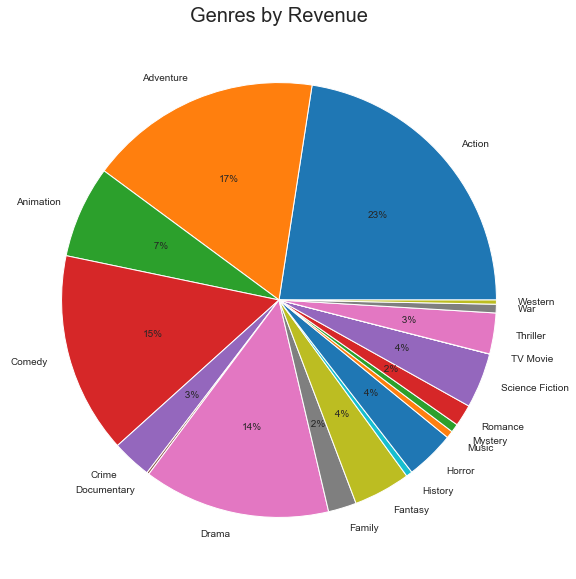

In [28]:
# Plotting a Pie-Chart.

pie_pct(genre_rev, 'revenue', 'main_genre', 'Genres by Revenue')


> The main genres generating the most revenue are:
> - Action with 23%, 
> - Adventure with 17%, 
> - Comedy with 15%, 
> - Drama with 14%, 
> - Animation with 7%, 
> of the total revenue

In [29]:
# Using groupby to group the genres by margin.

genre_db = df.groupby('main_genre', as_index=False).agg({"margin": "sum"})

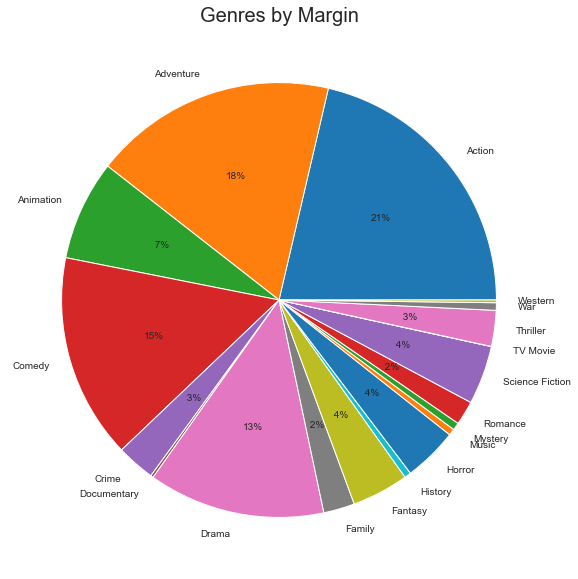

In [30]:
# Plotting a Pie-Chart.

pie_pct(genre_db, 'margin', 'main_genre', 'Genres by Margin')

> The main genres generating the most margin are:
> - Action with 21%, 
> - Adventure with 18%, 
> - Comedy with 15%, 
> - Drama with 13%, 
> - Animation with 7%, 
> of the total margin

> Out of this analysis we can say that actions movies are the most proftiable ones.
> Combining this with the first question we can say that the ratio of profitability does not depend on the genre chosen.

### Research Question 3 - What are the most common genres?

> Now we want to answer the question about the most common genres in our dataset. Does it corrospond with the results above?

In [31]:
#First let us filter the most common main genres out of the dataset by using value_counts().
common_genres = df['main_genre'].value_counts()
common_genres

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: main_genre, dtype: int64

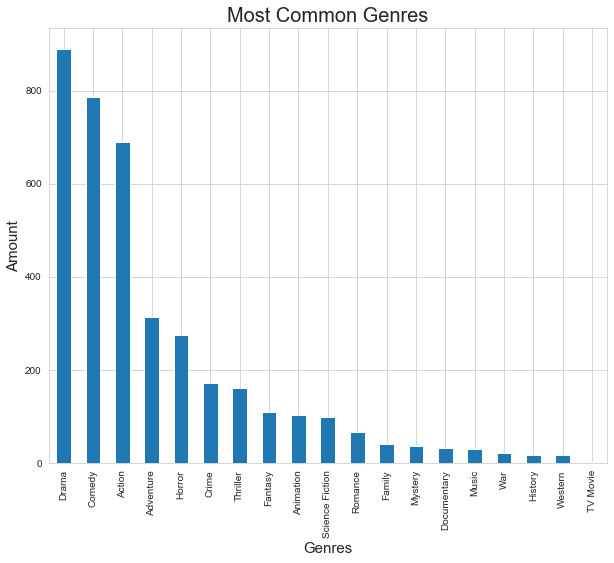

In [32]:
# Plotting a Bar-Chart.
barh_plot(common_genres, 'Counts', 'main_genre', 'Most Common Genres', 'Genres', 'Amount', 'bar')

> We can see that the most common main genre is 1. Dram, 2. Comedy, 3. Action.
> Here one would have expected the genre "Action" to be number 1, as this is the genre with the highest profitability.
> So what is the reason behind it? Maybe we will find out with the next question.

### Research Question 4 - Is there any relationship between main genre and vote average?

> To answer this question, we have to relate the main genre and the vote average of a movieto each other

> For that we will compare the overall vote average with the vote average of the single genre.

In [33]:
#Use describe() to find the mean() of vote_avg.
df.describe()

id   popularity        budget       revenue      runtime  \
count    3854.000000  3854.000000  3.854000e+03  3.854000e+03  3854.000000   
mean    39888.185262     1.191554  3.720370e+07  1.076866e+08   109.220291   
std     67222.527399     1.475162  4.220822e+07  1.765393e+08    19.922820   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6073.500000     0.462368  1.000000e+07  1.360003e+07    95.000000   
50%     11321.500000     0.797511  2.400000e+07  4.480000e+07   106.000000   
75%     38573.250000     1.368324  5.000000e+07  1.242125e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year        margin  
count  3854.000000   3854.000000   3854.000000  3.854000e+03  
mean    527.720291      6.168163   2001.261028  7.048292e+07  
std     879.956821      0.794920     11.282575  1.506195e+08  
min      10.000000      2.200000   1960.000000 -4.139124e+08  
25%      71.000000      5.700000   1995.000000 -1.321535e+06  
50%     204.000000      6.200000   2004.000000  2.002019e+07  
75%     580.000000      6.700000   2010.000000  8.170331e+07  
max    9767.000000      8.400000   2015.000000  2.544506e+09

In [34]:
#The mean of vote_avg is about 6.17
#Lets use query() to look into the samples above the total mean vote average.

df_vote_avg = df.query('vote_average > 6.17')


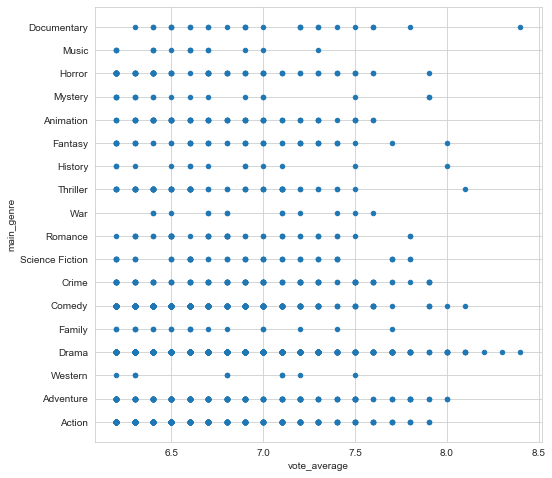

In [35]:
#Using scatter plot.
df_vote_avg.plot(x='vote_average', y='main_genre', kind='scatter', figsize=(8,8));

> On the scatter-plot it seems that the assumption could be right, that drama movies tend to get above average ratings.
> Lets try a different way.

> To see the distribution of the above average ratings we will create a bar chart. With that we will be abtle to verify the assumption.

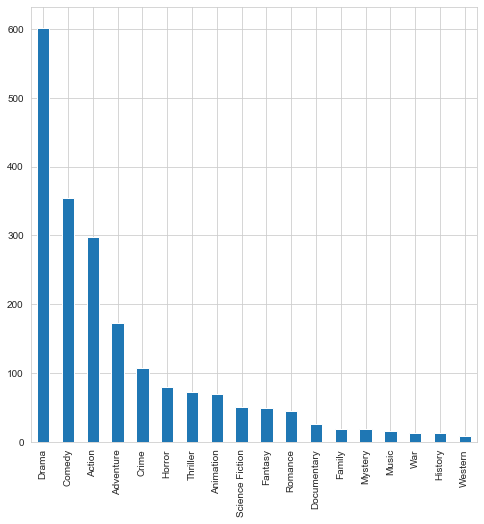

In [36]:
#Create a bar chart with the query.

df_vote_avg['main_genre'].value_counts().plot(kind='bar', figsize=(8,8));


> Now we can see it clearly. Drama movies get far more above average ratings than other genres.
> This could be the reason there are more drama movies than action movies, although action films have a higher margin.

<a id='conclusions'></a>
## Conclusions


> - We have found out which are the top movies in the dataset by revenue & margin.
> - We have also found that action films seem to offer the highest return on investment.
> - On the other hand, the most common genres that appear in movies are dramas.
> - We have found out that dramas get the highest average ratings. Which is why it can be concluded here that this is the reason for the frequency and the industry does not seem to be driven by profitability alone.


## Limitations

> - We could only use about one third of the data set, as the rest was of poor quality (Revenue & Budget).
> - We have only considered the unadjusted revenue & budget figures. And we ignored influences such as currency fluctuations and inflation.
> - We have also made the assumption that the first genre mentioned per film is always the main genre. Although most films probably cannot be reduced to just one genre.
> - Only quantitative values were used for the analysis. No qualitative values.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0